<a href="https://colab.research.google.com/github/ZiyanHanifGhossan/Project---Customer-Relationship-Manage/blob/main/crm_cust_relationship_manage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Nama : Ziyan Hanif Ghossan


> NIM  : 1217010086





In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [ ]:
# df = pd.read_csv('../data/data.csv', encoding = "ISO-8859-1", parse_dates=['InvoiceDate'])
df = pd.read_csv('/content/drive/MyDrive/DATA MINING/Text Mining, Image Processing, dan CRM./CRM/AutoSalesdata.csv', encoding = "ISO-8859-1", parse_dates=['ORDERDATE'])

<ipython-input-7-9e56f16fa85a>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/drive/MyDrive/DATA MINING/Text Mining, Image Processing, dan CRM./CRM/AutoSalesdata.csv', encoding = "ISO-8859-1", parse_dates=['ORDERDATE'])


In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,40.114802


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.shape

(2747, 20)

# Missing Value Check

In [ ]:
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [ ]:
df[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [ ]:
df[(~df['CustomerID'].isna()) & df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df.isna().sum() / df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

All Null `Description` comes from Null `CustomerID`. Since `CustomerID` can't be filled, and we need this variable, then we have to drop 25% of our data.

In [ ]:
df = df[~df['CustomerID'].isna()].reset_index(drop=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Variable Exploration

In [ ]:
df['CUSTOMERNAME']

0             Land of Toys Inc.
1            Reims Collectables
2               Lyon Souveniers
3             Toys4GrownUps.com
4          Technics Stores Inc.
                 ...           
2742      Euro Shopping Channel
2743    Oulu Toy Supplies, Inc.
2744      Euro Shopping Channel
2745               Alpha Cognac
2746          Gifts4AllAges.com
Name: CUSTOMERNAME, Length: 2747, dtype: object

In [ ]:
df['ORDERNUMBER']

0       10107
1       10121
2       10134
3       10145
4       10168
        ...  
2742    10350
2743    10373
2744    10386
2745    10397
2746    10414
Name: ORDERNUMBER, Length: 2747, dtype: int64

In [ ]:
df['QUANTITYORDERED'].unique()

array([30, 34, 41, 45, 36, 29, 48, 37, 23, 28, 46, 42, 20, 21, 24, 66, 26,
       38, 47, 35, 32, 40, 50, 39, 27, 22, 44, 31, 33, 49, 43, 56, 25, 64,
       19, 12, 55, 10, 54, 97, 61, 51, 59, 76,  6, 15, 60, 65, 58, 16, 70,
       13, 18, 52, 11, 62, 85, 77])

In [ ]:
df['ORDERDATE'].min(), df['ORDERDATE'].max()

(Timestamp('2018-01-06 00:00:00'), Timestamp('2020-05-31 00:00:00'))

In [ ]:
# convert to date
df['Date'] = df['ORDERDATE'].apply(lambda x: x.date())

<Axes: xlabel='Date'>

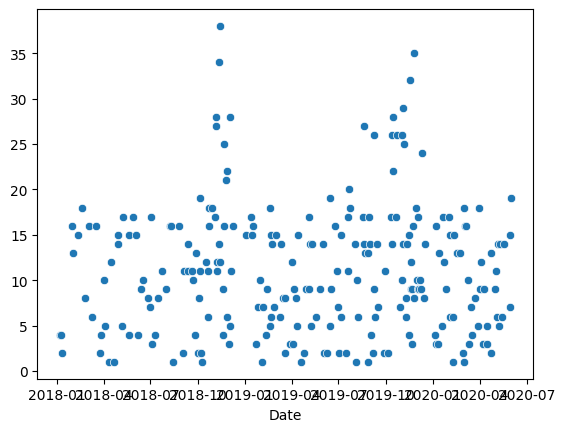

In [ ]:
# looking for anomaly
sns.scatterplot(data=df.groupby('Date').size())

In [ ]:
df['PRICEEACH'].describe()

count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64

<Axes: >

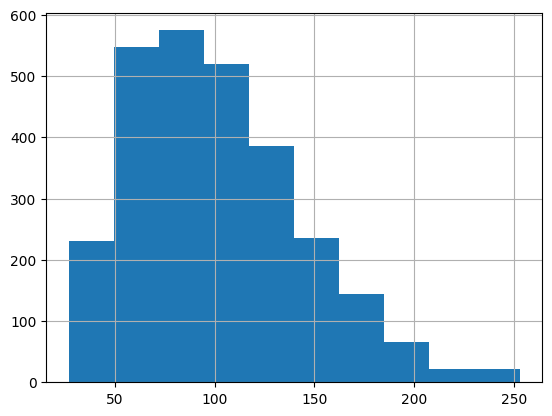

In [ ]:
df['PRICEEACH'].hist()

In [ ]:
df['QUANTITYORDERED'].describe()

count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

We have quantity less than 0. **Assumption**: Give away item. Need to exclude it.

In [ ]:
df[df['QUANTITYORDERED'] <= 0].head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Date


In [ ]:
df[df['QUANTITYORDERED'] <= 0].shape[0] / df.shape[0]

0.0

Less than 2%, drop it.

In [ ]:
df = df[df['Quantity'] > 0].reset_index(drop=True)

# Feature Engineering

In [ ]:
df['TotalPrice'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Date,TotalPrice
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018-02-24,2871.00
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018-05-07,2765.90
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2018-07-01,3884.34
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2018-08-25,3746.70
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2018-10-28,3479.76


In [ ]:
MAX_DATE = df['Date'].max()

In [ ]:
# assuming we get from the recent date
df['Recency'] = df['Date'].apply(lambda x: (MAX_DATE - x).days)

In [ ]:
df['Recency'].describe()

count    2747.000000
mean      383.085912
std       230.231295
min         0.000000
25%       196.000000
50%       342.000000
75%       570.000000
max       876.000000
Name: Recency, dtype: float64

In [ ]:
df['CUSTOMERNAME'] = df['CUSTOMERNAME'].astype('str')
df_agg = df.groupby('CUSTOMERNAME').agg({
    'TotalPrice': 'sum',
    'Recency': 'min',
    'ORDERNUMBER': 'count'
}).reset_index()
df_agg.columns = ['CustomerID', 'Monetary', 'Recency', 'Frequency']

In [ ]:
df_agg.head()

,CustomerID,Monetary,Recency,Frequency
0,"AV Stores, Co.",157807.81,196,51
1,Alpha Cognac,70488.44,64,20
2,Amica Models & Co.,94117.26,265,26
3,"Anna's Decorations, Ltd",153996.13,83,46
4,Atelier graphique,24179.96,188,7


In [ ]:
df_agg.describe()

,Monetary,Recency,Frequency
count,89.000000,89.000000,89.000000
mean,109665.413146,179.606742,30.865169
std,111837.419634,128.893862,31.370292
min,9129.350000,0.000000,3.000000
25%,70488.440000,75.000000,20.000000
50%,87489.230000,184.000000,26.000000
75%,120562.740000,230.000000,32.000000
max,912294.110000,495.000000,259.000000


# Quartile Segmentation

In [ ]:
df_agg['Monetary_Label'] = pd.qcut(
    df_agg['Monetary'],
    q=4,
    labels=[1, 2, 3, 4]
)
df_agg['Monetary_Label'].head()

0    4
1    1
2    3
3    4
4    1
Name: Monetary_Label, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
df_agg['Frequency_Label'] = pd.qcut(
    df_agg['Frequency'],
    q=4,
    labels=[1, 2, 3, 4]
)
df_agg['Frequency_Label'].head()

0    4
1    1
2    2
3    4
4    1
Name: Frequency_Label, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
  df_agg['Recency_Label'] = pd.qcut(
      df_agg['Recency'],
      q=4,
      labels=[4, 3, 2, 1]
  )
  df_agg['Recency_Label'].head()

0    2
1    4
2    1
3    3
4    2
Name: Recency_Label, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [ ]:
df_agg.head()[['CustomerID', 'Monetary_Label', 'Frequency_Label', 'Recency_Label']]

,CustomerID,Monetary_Label,Frequency_Label,Recency_Label
0,"AV Stores, Co.",4,4,2
1,Alpha Cognac,1,1,4
2,Amica Models & Co.,3,2,1
3,"Anna's Decorations, Ltd",4,4,3
4,Atelier graphique,1,1,2


# RFM Classification
RFM
4|4|>=3 - Big Fish

4|4|<3 - Loyal Customer

(3)|>=3|X - Regular Customer

(3)|<=2|X - Infrequent Customer

1XX - Lost Customer

<3|>=3|>=3 - Can't Lose

<3|X|X - About Churn



In [ ]:
def make_category(R,F,M):
    if R == 4 and F == 4 and M >= 3: return 'Big Fish'
    elif R >= 3 and F >= 3: return 'Regular Customer'
    elif R >= 3 and F <= 2: return 'Seasonal/New Customer'
    elif R == 2 and F >= 3 and M >= 3: return "Can't Lose"
    elif R == 2: return 'About to Churn'
    elif R == 1: return 'Lost Customer'
    else: return '??'

df_agg['category'] = df_agg.apply(
    lambda x: make_category(
        x['Recency_Label'],
        x['Frequency_Label'],
        x['Monetary_Label']
    ),
    axis=1
)

In [ ]:
df_agg_cat = df_agg.groupby('category').size().to_frame('total').reset_index()

<Axes: xlabel='total', ylabel='category'>

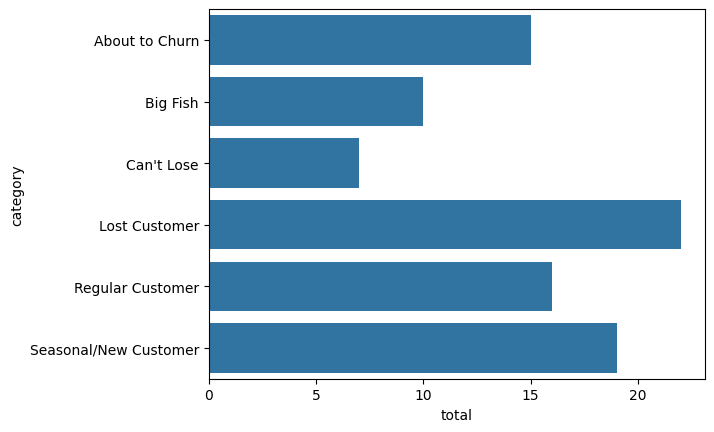

In [ ]:
sns.barplot(data=df_agg_cat, x='total', y='category')

In [ ]:
df_agg_clusters = df_agg[['CustomerID', 'Monetary', 'Recency', 'Frequency']].reset_index()
df_agg_clusters

,index,CustomerID,Monetary,Recency,Frequency
0,0,"AV Stores, Co.",157807.81,196,51
1,1,Alpha Cognac,70488.44,64,20
2,2,Amica Models & Co.,94117.26,265,26
3,3,"Anna's Decorations, Ltd",153996.13,83,46
4,4,Atelier graphique,24179.96,188,7
...,...,...,...,...,...
84,84,"Vida Sport, Ltd",117713.56,275,31
85,85,Vitachrome Inc.,88041.26,208,25
86,86,"Volvo Model Replicas, Co",75754.88,194,19
87,87,West Coast Collectables Co.,46084.64,488,13


# Segmenting Using Unsupervised Learning

Apart from using quartile to segmenting the data, we could use another technique such as clustering to automatically find cluster from the data.
In this simple experiment, we will use KMeans to find the segment.

# Data Scaling

Since the data having different range (i.e price in hundred thousand, but frequency in 1-100), it's a good idea to scale the data so when doing distance calculation, one variable doesn't hugely impact the calculation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = {}
for key in ('Monetary', 'Recency', 'Frequency'):
    scaler[key] = StandardScaler()
    df_agg_clusters['scaled_{}'.format(key)] = scaler[key].fit_transform(df_agg_clusters[[key]])

In [ ]:
df_agg_clusters.head()

,index,CustomerID,Monetary,Recency,Frequency,scaled_Monetary,scaled_Recency,scaled_Frequency
0,0,"AV Stores, Co.",157807.81,196,51,0.432907,0.127905,0.645480
1,1,Alpha Cognac,70488.44,64,20,-0.352288,-0.901996,-0.348315
2,2,Amica Models & Co.,94117.26,265,26,-0.139812,0.666262,-0.155967
3,3,"Anna's Decorations, Ltd",153996.13,83,46,0.398631,-0.753753,0.485191
4,4,Atelier graphique,24179.96,188,7,-0.768703,0.065487,-0.765067


# Find the best K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19, random_state=5),
                 k=(2, 20))

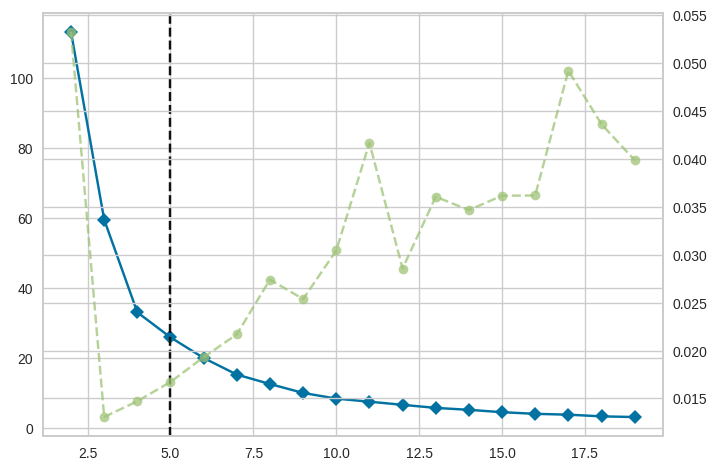

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2, 20))
X = df_agg_clusters[['scaled_Recency', 'scaled_Frequency', 'scaled_Monetary']]
visualizer.fit(X)

# Modeling

In [ ]:
model = KMeans(5, random_state=5)
clusters = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_agg_clusters['cluster'] = clusters

In [ ]:
df_agg_clusters.groupby('cluster').size()

cluster
0    36
1     2
2    11
3    24
4    16
dtype: int64

### Interpreting Result

<Axes: xlabel='cluster', ylabel='Monetary'>

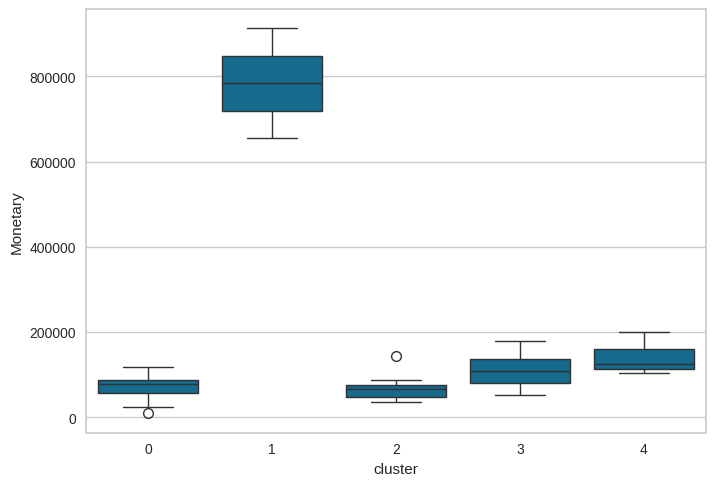

In [ ]:
sns.boxplot(data=df_agg_clusters, x='cluster', y='Monetary')

<Axes: xlabel='cluster', ylabel='Recency'>

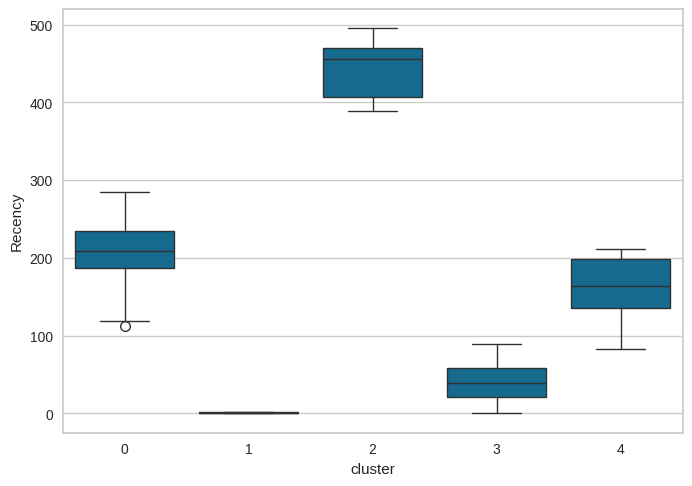

In [ ]:
sns.boxplot(data=df_agg_clusters, x='cluster', y='Recency')

<Axes: xlabel='cluster', ylabel='Frequency'>

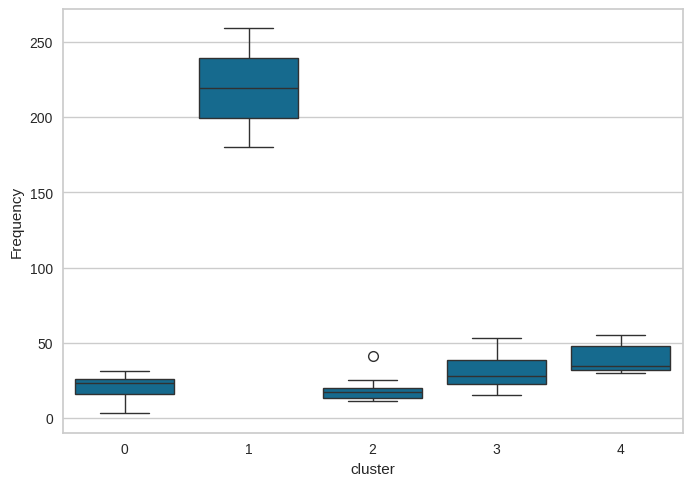

In [ ]:
sns.boxplot(data=df_agg_clusters, x='cluster', y='Frequency')